<div align="center">

# Programming for Data Analytics Project
## Residential Property Price Register Analysis
***

</div>

<p align="center">
    <img width="959" height="539" src="./images/housing_predictions.webp" alt="Sublime's custom image"/
    >
    </p>

###### [Image from Forbes.com](https://www.forbes.com/advisor/mortgages/real-estate/housing-market-predictions/)

### Table of Contents


1. About the Project
   
2. Import Libraries
   
3. Load Data

4. Data Exploration
   
    4.1  Check for the DataFrame

    4.2  Check for the DataFrame dimensionality with pandas .info() method

    4.3  Generate descriptive statistics with pandas .describe method

    4.4  Check for missing values   

5. Data Analysis
   
    5.1  Analysis of Property Prices in Ireland (2010-2024)
    
     - 5.1.1    Average property prices by county

     - 5.1.2    Number of property sales by county

     - 5.1.3    Average property prices by year

     - 5.1.4    Average property prices by month

     - 5.1.5    Number of occurrences of each property type

     - 5.1.6    Average property prices by property type (2010-2024)

     - 5.1.7    Full Market price comparison
  
    5.2 Analysis of Property Prices in Mayo (2010-2024)
 
     - 5.2.1    Data Preparation for Analysis

     - 5.2.2    Average Mayo Property Price by Year

     - 5.2.3    Average Mayo Property Price by Month

     - 5.2.4    Average Mayo Property Price by month in 2024

     - 5.2.5    Number of property sales in Mayo in 2024

     - 5.2.6    Number of occurrences of each property type in Mayo

     - 5.2.7    Average property price by property type in Mayo in 2024

     - 5.2.8    Full Market price comparison in Mayo

    5.3 Analysis of Property Prices in Castlebar (2024)
 
     - 5.3.1    
 
6.  References

### 1. About the Project
***

### 2. Import the Libraries
***

I imported the following libraries to plot the dataset.

- `matplotlib.pyplot`: Essential for creating static, animated, and interactive visualizations in Python. It is closely integrated with NumPy and provides a MATLAB-like interface for creating plots and visualizations.
- `numpy`: It contains functionality for multidimensional arrays, high-level mathematical functions such as linear algebra operations.
- `pandas`: Fundamental data analysis and manipulation library built on top of the Python programming language. It offers data structures and operations for manipulating numerical tables and time series.
- `seaborn`: Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.
- `datetime`: The datetime is a built-in module that provides classes for manipulating dates and times
- `re`: The re module provides a set of functions to work with regular expressions, used for searching, matching, and manipulating strings.
- `matplotlib.dates`: Matplotlib provides sophisticated date plotting capabilities, standing on the shoulders of python datetime and the add-on module dateutil.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import datetime
import re
import matplotlib.dates as mdates

### 3. Load the Data
***
Load the dataset from the Residential Property Price Register website https://www.propertypriceregister.ie/


In [2]:
df=pd.read_csv("./data/ppr_all.csv")

C:\Users\curleys\AppData\Local\Temp\ipykernel_18624\1623581419.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("./data/ppr_all.csv")


### 4. Data Exploration
***

#### 4.1 Check the dataframe using df.head

Lets have an initial glance at the data

In [3]:
df.head(5)

,Date of Sale (dd/mm/yyyy),Address,County,Eircode,Price in Euro,Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description
0,01/01/2010,"5 Braemor Drive, Churchtown, Co.Dublin",Dublin,NaN,343000.0,No,No,Second-Hand Dwelling house /Apartment,NaN
1,03/01/2010,"134 Ashewood Walk, Summerhill Lane, Portlaoise",Laois,NaN,185000.0,No,Yes,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...
2,04/01/2010,"1 Meadow Avenue, Dundrum, Dublin 14",Dublin,NaN,438500.0,No,No,Second-Hand Dwelling house /Apartment,NaN
3,04/01/2010,"1 The Haven, Mornington",Meath,NaN,400000.0,No,No,Second-Hand Dwelling house /Apartment,NaN
4,04/01/2010,"11 Melville Heights, Kilkenny",Kilkenny,NaN,160000.0,No,No,Second-Hand Dwelling house /Apartment,NaN


#### 4.2  Check for the DataFrame dimensionality with pandas .info() method

The .info() method in Pandas provides valuable insights about the DataFrame. The information contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values). The info() method does not return any value, it prints the information. [[1]](https://www.w3schools.com/python/pandas/ref_df_info.asp) 

The output of the .info() method consists of several key components: [[2]](https://machinelearningtutorials.org/a-comprehensive-guide-to-using-the-pandas-dataframe-info-method/)

- The total number of rows (entries) in the DataFrame.

- A summary of each column, including:
  - The column name
  - The number of non-null values
  - The data type of the column
  - The memory usage of the column

The dataset contains the following columns:

- Date of Sale (dd/mm/yyyy): Date when the property was sold.

- Address: Address of the property.

- County: The county in which the property is located.

- Eircode: Eircode of the property.

- Price in Euro: The sale price of the property in Euros.

- Not Full Market Price: Indicates whether the sale was at the full market price.

- VAT Exclusive: Indicates whether VAT was excluded in the sale price.

- Description of Property: Type of property (e.g., second-hand or new).

- Property Size Description: Description of the property size (e.g., "greater than 125 sq metres").


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 694503 entries, 0 to 694502
Data columns (total 9 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Date of Sale (dd/mm/yyyy)  694503 non-null  object 
 1   Address                    694503 non-null  object 
 2   County                     694503 non-null  object 
 3   Eircode                    166138 non-null  object 
 4   Price in Euro              694503 non-null  float64
 5   Not Full Market Price      694503 non-null  object 
 6   VAT Exclusive              694503 non-null  object 
 7   Description of Property    694503 non-null  object 
 8   Property Size Description  52830 non-null   object 
dtypes: float64(1), object(8)
memory usage: 47.7+ MB


Upon review, I can gather the following information:

- The DataFrame contains 694503 rows and 9 columns.
- The columns are: Date of Sale", ""Address", "County", "Eircode", "Price in Euro", "Not Full Market Price","VAT Exclusive", "Description of Property" and "Property Size Description".
- Some columns have non-null values, indicating that there are missing values in this dataset. Two variables of the columns have missing values.
- One quantitative variables is numeric with type float64: "Price in Euro". 
- Eight qualitative variables are categorical with type object: "Date of Sale", ""Address", "County", "Eircode", "Not Full Market Price","VAT Exclusive", "Description of Property" and "Property Size Description".
- The memory usage of this DataFrame is approximately 47.7 MB.

###### [1] [w3schools Pandas DataFrame info() Method](https://www.w3schools.com/python/pandas/ref_df_info.asp)
###### [2] [Understanding the .info output - Machine Learning Tutorials](https://machinelearningtutorials.org/a-comprehensive-guide-to-using-the-pandas-dataframe-info-method/)

#### 4.3  Generate descriptive statistics with pandas df.describe method

This analysis provides generalized descriptive statistics that summarises the central tendency of the data, the dispersion, and the shape of the dataset’s distribution. It also provides helpful information on missing NaN data. It includes the following statistics: [[3]](https://www.pythonlore.com/exploring-pandas-dataframe-describe-for-descriptive-statistics/)  [[4]](https://pandas.pydata.org/pandas-docs/version/0.20.2/generated/pandas.DataFrame.describe.html)

By default, the describe() function only generates descriptive statistics for numeric columns in a pandas DataFrame. I specifying include='all' which will force pandas to generate summaries for all columns in the dataframe. Some data types don’t have any information. Pandas marks them as NaN.


- Count: This represents the number of non-null (non-empty) values in the dataset for each column.

- Unique: This will show the number of unique values in the column

- Top: Ths will display the most common value in the column

- Frequency: This will show the frequency of the top value within the column.

- Mean: This will display the average value for each column.

- Standard deviation: It indicates how spread out the values are around the mean. A higher standard deviation means the values are more spread out from the mean, while a lower standard deviation means the values are closer to the mean.

- Minimum: It represents the lowest value in each column.

- The default percentiles of the describe function are 25th, 50th, and 75th percentile or (0.25, 0.5, and 0.75).
  
- First quartile (25th percentile): 25% of the data values are below this value.

- Second quartile (50th percentile): It represents the median, the middle value of the dataset.

- Third quartile (75th percentile): 75% of the data values are below this value.

- Maximum: It represents the highest value in the dataset.

In [5]:
df.describe(include="all")


,Date of Sale (dd/mm/yyyy),Address,County,Eircode,Price in Euro,Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description
count,694503,694503,694503,166138,6.945030e+05,694503,694503,694503,52830
unique,5145,622025,26,160850,NaN,2,2,5,6
top,22/12/2014,"Broomfield, Midleton",Dublin,D24W9NN,NaN,No,No,Second-Hand Dwelling house /Apartment,greater than or equal to 38 sq metres and less...
freq,1542,21,217653,34,NaN,659594,579152,576951,38096
mean,NaN,NaN,NaN,NaN,2.977859e+05,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,1.024681e+06,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,5.001000e+03,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,1.350000e+05,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,2.270000e+05,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,3.400000e+05,NaN,NaN,NaN,NaN


Key interpretations can be made from this function, both for the quantitative and qualitative data. 

Null values: Confirming the observations made from .info, the count of THE "Eircode" and "Property Size Description" rows does not match the count of values the other columns, indicating missing data.

###### [3] [Understanding the Output of pandas.DataFrame.describe](https://www.pythonlore.com/exploring-pandas-dataframe-describe-for-descriptive-statistics/)
###### [4] [Pandas Documentation on pandas.DataFrame.describe](https://pandas.pydata.org/pandas-docs/version/0.20.2/generated/pandas.DataFrame.describe.html)

#### 4.4 Check for missing data using df.isna

In [6]:
print(df.isna().sum())

Date of Sale (dd/mm/yyyy)         0
Address                           0
County                            0
Eircode                      528365
Price in Euro                     0
Not Full Market Price             0
VAT Exclusive                     0
Description of Property           0
Property Size Description    641673
dtype: int64


Using the dataframe `.isna()` to detect missing values [[5]](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isna.html), there are two of the columns, "Eircode" and "Property Size Description" have missing values. I will keep this in  mind throughout the project.

###### [5] [pandas.DataFrame.isna](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isna.html)

## 5.   Data Analysis

***

### 5.1  Analysis of Property Prices in Ireland (2010-2024)


Before the analysis, I need to set the `Date of Sale` from Object to datetime. [[6]](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html) [[7]](https://www.geeksforgeeks.org/python-pandas-to_datetime/)   [[8]](https://www.w3schools.com/python/python_datetime.asp)

In [7]:
df["Date of Sale (dd/mm/yyyy)"]

0         01/01/2010
1         03/01/2010
2         04/01/2010
3         04/01/2010
4         04/01/2010
             ...    
694498    22/11/2024
694499    22/11/2024
694500    22/11/2024
694501    22/11/2024
694502    22/11/2024
Name: Date of Sale (dd/mm/yyyy), Length: 694503, dtype: object

In [8]:
df["Date of Sale"] = pd.to_datetime(df["Date of Sale (dd/mm/yyyy)"], format="%d/%m/%Y")

In [9]:
df["Date of Sale"]

0        2010-01-01
1        2010-01-03
2        2010-01-04
3        2010-01-04
4        2010-01-04
            ...    
694498   2024-11-22
694499   2024-11-22
694500   2024-11-22
694501   2024-11-22
694502   2024-11-22
Name: Date of Sale, Length: 694503, dtype: datetime64[ns]

I want to add a new column "Year"and "Month" to the DataFrame df by extracting the year/month from the "Date of Sale" column which now contains datetime objects. The dt accessor is used to access datetime-specific properties and methods for columns containing datetime objects. It allows you to extract date components such as the year, month, day, etc.[[9]](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.year.html) [[10]](https://www.statology.org/how-to-extract-date-components-year-month-day-in-python/)

In [10]:
df["Year"] = df["Date of Sale"].dt.year
print(df["Year"])

0         2010
1         2010
2         2010
3         2010
4         2010
          ... 
694498    2024
694499    2024
694500    2024
694501    2024
694502    2024
Name: Year, Length: 694503, dtype: int32


In [11]:
df["Month"] = df["Date of Sale"].dt.month
print (df["Month"])

0          1
1          1
2          1
3          1
4          1
          ..
694498    11
694499    11
694500    11
694501    11
694502    11
Name: Month, Length: 694503, dtype: int32


###### References

###### [6] [pandas.to_datetime](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html)
###### [7] [pandas.to_datetime](https://www.geeksforgeeks.org/python-pandas-to_datetime/)
###### [8] [w3schools - Python Datetime](https://www.w3schools.com/python/python_datetime.asp)
###### [9] [pandas.pydata](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.year.html) 
###### [10] [How to Extract Date Components (Year, Month, Day) in Python](https://www.statology.org/how-to-extract-date-components-year-month-day-in-python/)

#### 5.1.1 Average property prices by county (2010-2024)

In [133]:
#avg_price_by_county = df.groupby("County")["Price in Euro"].mean().sort_index().round()
#print(avg_price_by_county)

First, I want to get the average property price by county in Ireland from 2010 to 2024 to date [[11]](https://seaborn.pydata.org/generated/seaborn.lineplot.html) [[12]](https://medium.com/@mdnu08/automatically-annotate-the-maximum-value-in-a-plot-created-using-the-python-matplotlib-library-54c43001e39c#:~:text=We%20can%20then%20annotate%20the%20maximum%20value%20in%20the%20plot) [[13]](https://www.geeksforgeeks.org/matplotlib-pyplot-annotate-in-python/) [[14]](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.annotate.html)

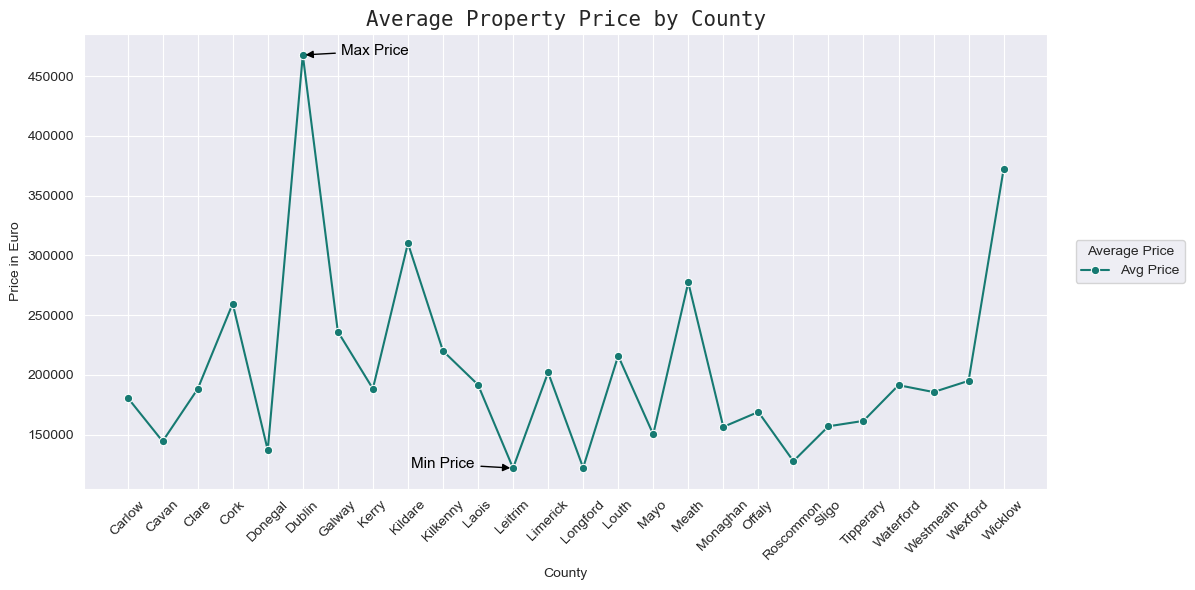

In [20]:
avg_price_by_county = df.groupby("County")["Price in Euro"].mean().sort_index().round()
plt.figure(figsize=(12, 6))
sns.set_style("darkgrid")
sns.set_palette("BrBG_r")
ax = sns.lineplot(data=avg_price_by_county, marker="o", label="Avg Price")
plt.title("Average Property Price by County", family="monospace", fontsize=15)
plt.legend(title="Average Price",loc="center right",bbox_to_anchor=(1, 0, 0.15, 1)) 
plt.xticks(rotation=45)     

max_price = avg_price_by_county.max()                               # Find the max price
max_county = avg_price_by_county.idxmax()                           # Find the county with the max price
ax.annotate("Max Price", 
            (max_county, max_price),                                # Point to annotate
            xytext=(list(avg_price_by_county.index).index(max_county) + 1.1, max_price + 2.9),  # converts the county names to their index positions in the list.
            arrowprops=dict(arrowstyle="-|>",color="black"),        # Arrow properties
            fontsize=11,
            color="black") 

min_price = avg_price_by_county.min()                               # Find the min price
min_county = avg_price_by_county.idxmin()                           # Find the county with the min price
ax.annotate("Min Price", 
            (min_county, min_price),                                # Point to annotate
            xytext=(list(avg_price_by_county.index).index(min_county) -2.9, min_price + 2.9),  # Positioning the text
            arrowprops=dict(arrowstyle="-|>",color="black"),        # Arrow properties
            fontsize=11,
            color="black") 
                    
plt.tight_layout()
plt.show()


In [21]:
highest_avg_price_county = avg_price_by_county.idxmax()
highest_avg_price = int(avg_price_by_county.max())
lowest_avg_price_county = avg_price_by_county.idxmin()
lowest_avg_price = int(avg_price_by_county.min())
print(f"{highest_avg_price_county} has the highest average property price in Ireland, with an average price of €{highest_avg_price}.")
print(f"{lowest_avg_price_county} has the lowest average property price in Ireland, with an average price of €{lowest_avg_price}.")

Dublin has the highest average property price in Ireland, with an average price of €467700.
Leitrim has the lowest average property price in Ireland, with an average price of €122075.


###### References

###### [11] [seaborn.lineplot](https://seaborn.pydata.org/generated/seaborn.lineplot.html)

###### [12] [Automatically Annotate The Maximum Value In A Plot Created Using The Python Matplotlib library](https://medium.com/@mdnu08/automatically-annotate-the-maximum-value-in-a-plot-created-using-the-python-matplotlib-library-54c43001e39c#:~:text=We%20can%20then%20annotate%20the%20maximum%20value%20in%20the%20plot)

###### [13] [GeeksforGeeks-Matplotlib.pyplot.annotate() in Python](https://www.geeksforgeeks.org/matplotlib-pyplot-annotate-in-python/)

###### [14] [matplotlib.pyplot.annotate](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.annotate.html)

#### 5.1.2 Number of property sales by county

Next, I will analyse the numbers of sales per county [[15]](https://seaborn.pydata.org/generated/seaborn.countplot.html). Dublin has the highest sales in the last 14 years, with Cork coming in second. 

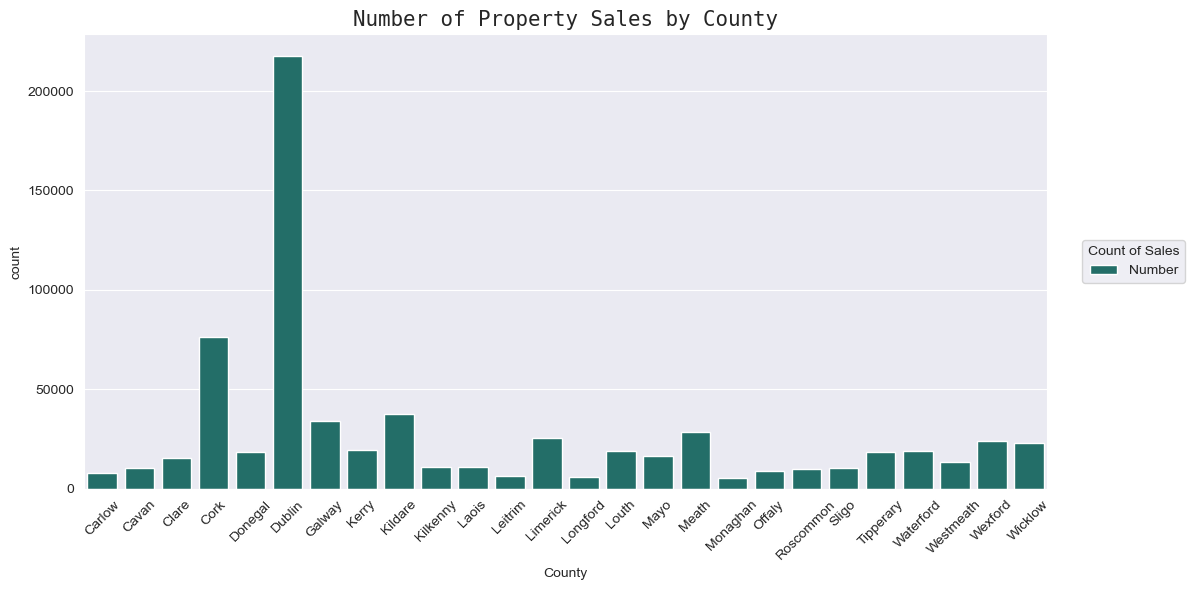

In [22]:
sorted_counties = sorted(df["County"].unique())
plt.figure(figsize=(12, 6))
sns.set_style("darkgrid")
sns.set_palette("BrBG_r")
ax = sns.countplot(data=df, x="County", order=sorted_counties, label="Number")
plt.title("Number of Property Sales by County", family="monospace", fontsize=15)
plt.legend(title="Count of Sales",loc="center right",bbox_to_anchor=(1, 0, 0.15, 1)) 
plt.xticks(rotation=45)                         
plt.tight_layout()
plt.show()

###### References

###### [15] [seaborn.countplot](https://seaborn.pydata.org/generated/seaborn.countplot.html)


#### 5.1.3 Average property prices by year (2010-2024)

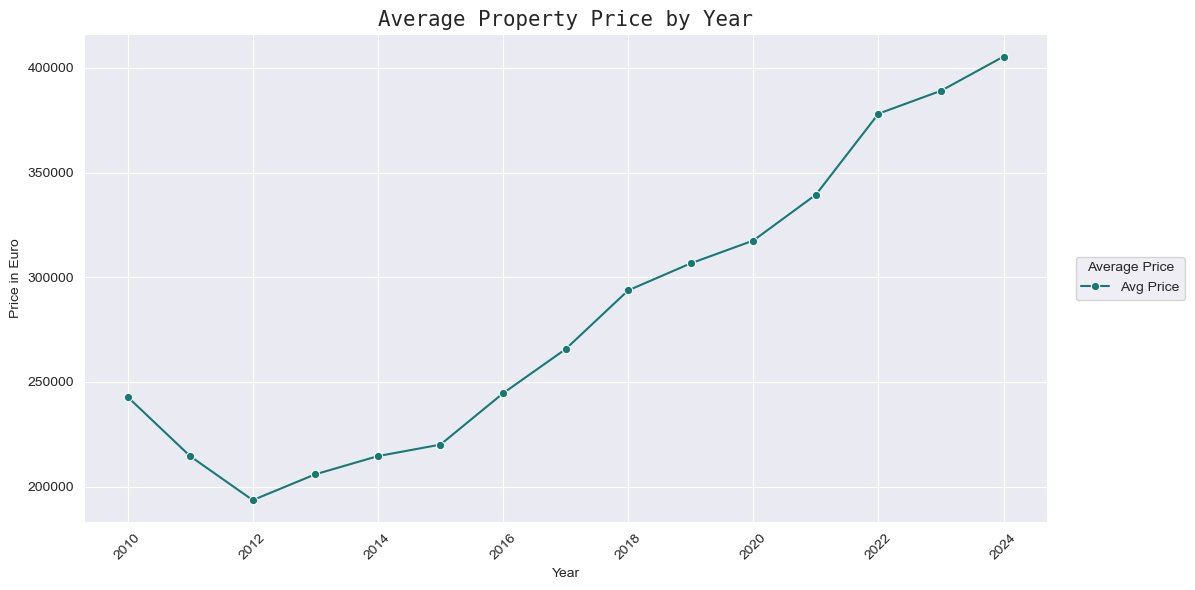

In [ ]:
avg_price_by_year = df.groupby("Year")["Price in Euro"].mean().round().sort_values()
plt.figure(figsize=(12, 6))
sns.set_style("darkgrid")
sns.set_palette("BrBG_r")
ax = sns.lineplot(data=avg_price_by_year, marker="o", label="Avg Price")
plt.title("Average Property Price by Year", family="monospace", fontsize=15)
plt.legend(title="Average Price",loc="center right",bbox_to_anchor=(1, 0, 0.15, 1)) 
plt.xticks(rotation=45)                         
plt.tight_layout()
plt.show()


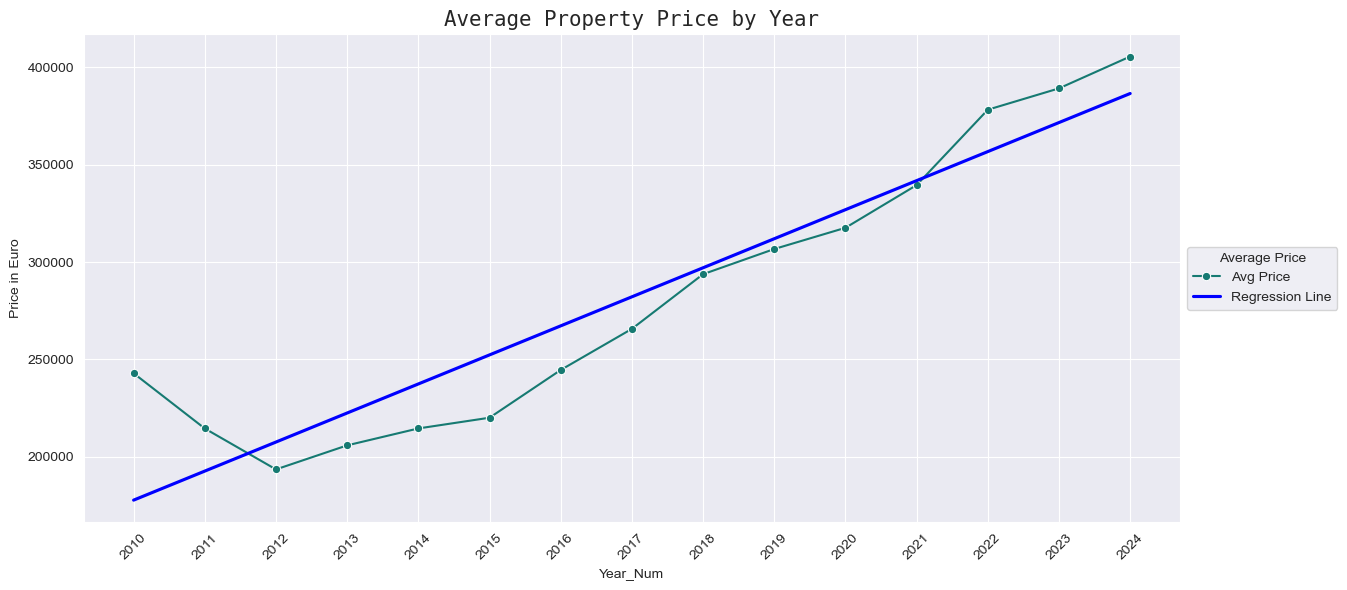

In [29]:
avg_price_by_year = df.groupby("Year")["Price in Euro"].mean().round().sort_values()

plt.figure(figsize=(13.5, 6))
sns.set_style("darkgrid")
sns.set_palette("BrBG_r")

avg_price_df = avg_price_by_year.reset_index()                  # Convert the data into a DataFrame with numerical indices
avg_price_df["Year_Num"] = pd.to_numeric(avg_price_df["Year"])

ax = sns.lineplot(data=avg_price_by_year, marker="o", label="Avg Price")  # plot line chart
sns.regplot(x="Year_Num", y="Price in Euro", data=avg_price_df, scatter=False, ci=None, color="blue", label="Regression Line") # Add regression line

plt.title("Average Property Price by Year", family="monospace", fontsize=15)
plt.legend(title="Average Price", loc="center right", bbox_to_anchor=(1, 0, 0.15, 1))
plt.xticks(avg_price_df["Year_Num"], avg_price_df["Year"], rotation=45)
plt.tight_layout()
plt.show()


https://en.wikipedia.org/wiki/Irish_property_bubble


The above Clearly iLLustrate the properTy price crash Ireland faced in 2010-2012. It coincided with the 2009 recession as both had started to develop in late 2008 following the global economic slowdown and credit control tightening. The Irish property bubble was the speculative excess element of a long-term price increase of real estate in the Republic of Ireland from the early 2000s to 2007, a period known as the later part of the Celtic Tiger. The collapse of the property bubble was one of the major contributing factors to the post-2008 Irish banking crisis.

#### 5.1.4 Average property prices by month (2010-2024)

In [19]:
avg_price_by_month = df.groupby("Month")["Price in Euro"].mean().round().sort_values()
print(avg_price_by_month)

Month
5     282617.0
1     283823.0
3     287168.0
4     288848.0
2     293714.0
11    295199.0
12    300688.0
6     303963.0
8     304590.0
7     306255.0
10    306818.0
9     307859.0
Name: Price in Euro, dtype: float64


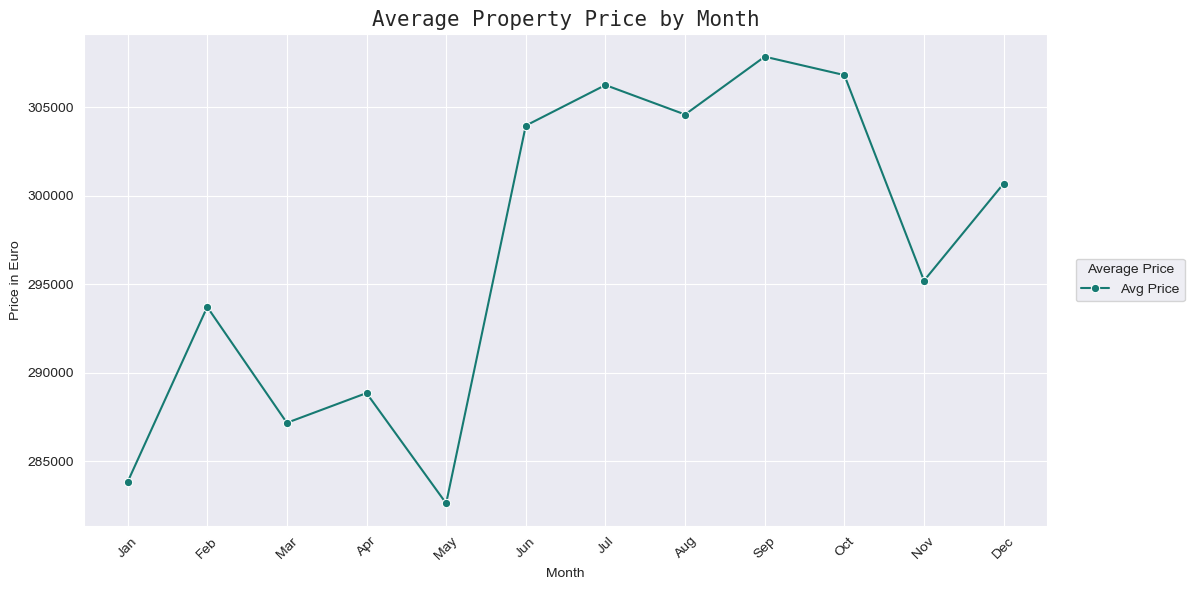

In [20]:
month_names = {1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr",5: "May", 6: "Jun", 7: "Jul", 8: "Aug",9: "Sep", 10: "Oct", 11: "Nov", 12: "Dec"}
avg_price_by_month = df.groupby("Month")["Price in Euro"].mean().round()
avg_price_by_month = avg_price_by_month.reindex(sorted(avg_price_by_month.index))  # Sort the months by their numeric order
avg_price_by_month.index = avg_price_by_month.index.map(month_names)   # Replace numerical indices with month names
plt.figure(figsize=(12, 6))
sns.set_style("darkgrid")
sns.set_palette("BrBG_r")
ax = sns.lineplot(data=avg_price_by_month, marker="o", label="Avg Price")
plt.title("Average Property Price by Month", family="monospace", fontsize=15)
plt.legend(title="Average Price",loc="center right",bbox_to_anchor=(1, 0, 0.15, 1)) 
plt.xticks(rotation=45)                         
plt.tight_layout()
plt.show()

#### 5.1.5 Number of occurrences of each property type

In [21]:
description_of_property_counts = df["Description of Property"].value_counts().sort_values()
print(description_of_property_counts)

Description of Property
Teach/?ras?n C?naithe Nua                     1
Teach/arasan Conaithe Nua                     3
Teach/arasan Conaithe Athaimhe               40
New Dwelling house /Apartment            117508
Second-Hand Dwelling house /Apartment    576951
Name: count, dtype: int64


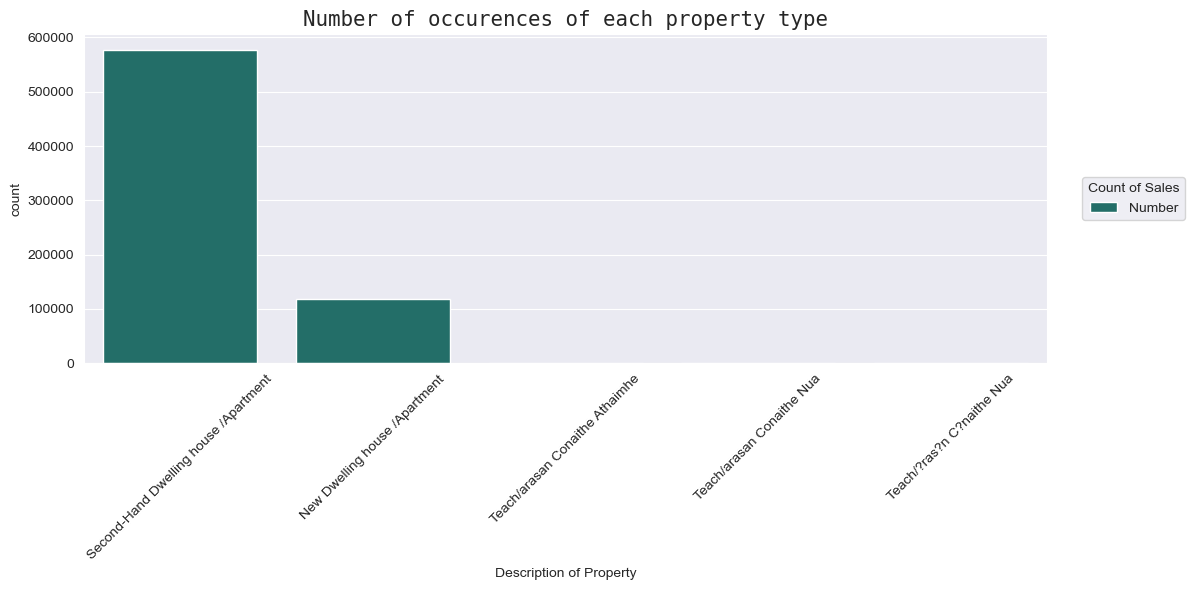

In [22]:
plt.figure(figsize=(12, 6))
sns.set_style("darkgrid")
sns.set_palette("BrBG_r")
ax = sns.countplot(data=df, x="Description of Property", label="Number")
plt.title("Number of occurences of each property type", family="monospace", fontsize=15)
plt.legend(title="Count of Sales",loc="center right",bbox_to_anchor=(1, 0, 0.15, 1)) 
plt.xticks(rotation=45)                         
plt.tight_layout()
plt.show()

#### 5.1.6 Average property prices by property type (2010-2024)

In [23]:
avg_price_by_property_type = df.groupby("Description of Property")["Price in Euro"].mean().round().sort_values()
print(avg_price_by_property_type)

Description of Property
Teach/?ras?n C?naithe Nua                115045.0
Teach/arasan Conaithe Nua                253318.0
Second-Hand Dwelling house /Apartment    281047.0
Teach/arasan Conaithe Athaimhe           326982.0
New Dwelling house /Apartment            379966.0
Name: Price in Euro, dtype: float64


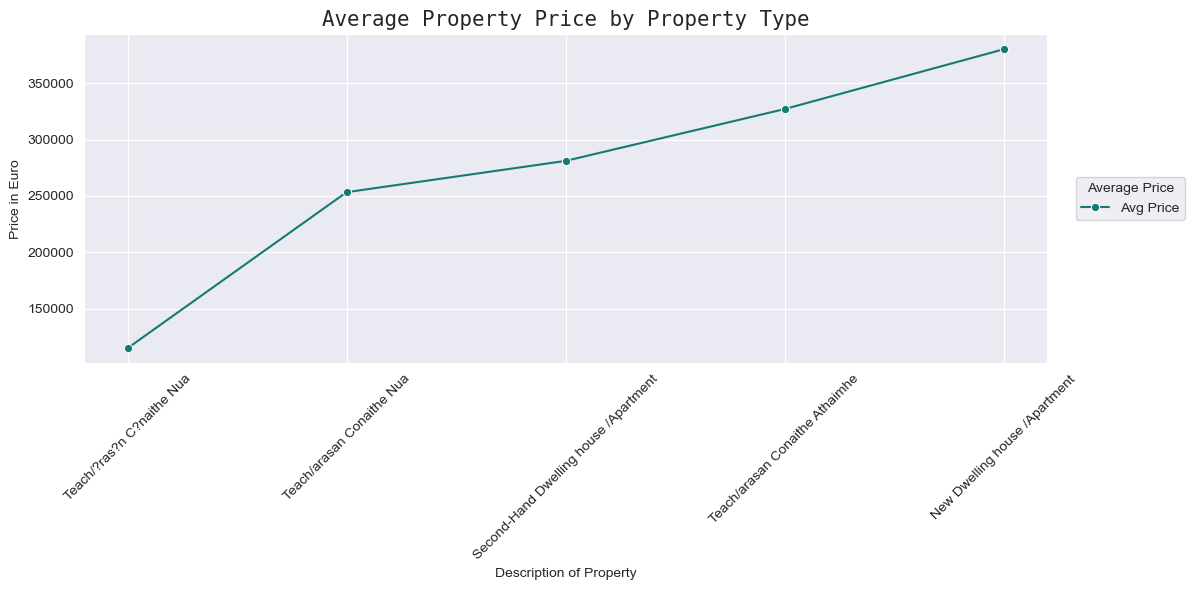

In [24]:
avg_price_by_property_type = df.groupby("Description of Property")["Price in Euro"].mean().round().sort_values()
plt.figure(figsize=(12, 6))
sns.set_style("darkgrid")
sns.set_palette("BrBG_r")
ax = sns.lineplot(data=avg_price_by_property_type, marker="o", label="Avg Price")
plt.title("Average Property Price by Property Type", family="monospace", fontsize=15)
plt.legend(title="Average Price",loc="center right",bbox_to_anchor=(1, 0, 0.15, 1)) 
plt.xticks(rotation=45)                         
plt.tight_layout()
plt.show()

#### 5.1.7 Full Market price comparison

In [25]:
full_market_price_counts = df["Not Full Market Price"].value_counts()
print(full_market_price_counts)

Not Full Market Price
No     659594
Yes     34909
Name: count, dtype: int64


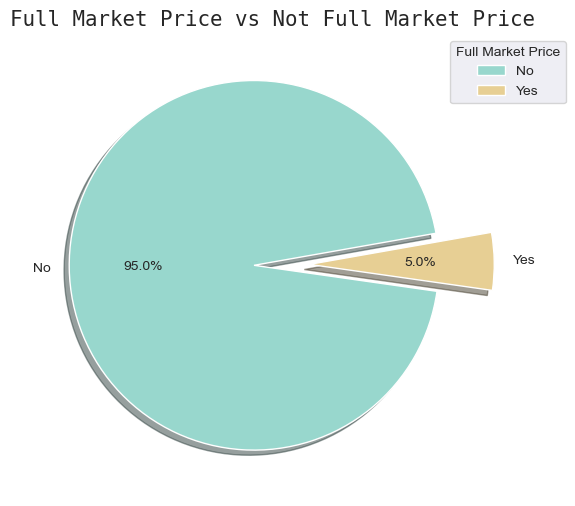

In [26]:
full_market_price_counts = df["Not Full Market Price"].value_counts()
explode = (0.1, 0.2)          # the explode will help to separate the two elements
palette_colour=sns.color_palette("BrBG_r",n_colors=2)
plt.figure(figsize=(12, 6))
plt.pie(full_market_price_counts, labels=full_market_price_counts.index, autopct="%1.1f%%", colors=palette_colour, startangle=370, explode=explode, shadow=True)
plt.legend(title="Full Market Price",loc="best",bbox_to_anchor=(1, 0, 0.15, 1)) 
plt.title("Full Market Price vs Not Full Market Price", family="monospace", fontsize=15)
plt.show()

### 5.2 Analysis of Property Prices for all years in Mayo (2010-2024)


#### 5.2.1 Data Preparation for Analysis

In [27]:
df_mayo = df[df["County"] == "Mayo"]
print(df_mayo)

       Date of Sale (dd/mm/yyyy)                                     Address  \
30                    04/01/2010    CARROWTRASNA, CARROWMORE LACKEN, BALLINA   
35                    04/01/2010  No. 11 Blackrock Court, Quay Road, Ballina   
46                    05/01/2010   13  Slievemore Apartments, Dugort, Achill   
232                   11/01/2010           33, St. Patrick's Estate, Ballina   
246                   11/01/2010                          Lawaus, Ballindine   
...                          ...                                         ...   
694316                20/11/2024           27 GLENBROOK, KILTIMAGH RD, KNOCK   
694366                20/11/2024             KNOCKANANY, MOYGOWNAGH, BALLINA   
694442                21/11/2024                KNAPPAGH BEG, WESTPORT, MAYO   
694460                22/11/2024       14 OAK VIEW, TURLOUGH ROAD, CASTLEBAR   
694476                22/11/2024               4 MEADOW PARK, SWINFORD, MAYO   

       County  Eircode  Price in Euro N

Before the analysis, I need to set the `Date of Sale` from Object to datetime. 

In [86]:
df_mayo["Date of Sale (dd/mm/yyyy)"]

Date of Sale
2010-01-04    04/01/2010
2010-01-04    04/01/2010
2010-01-05    05/01/2010
2010-01-11    11/01/2010
2010-01-11    11/01/2010
                 ...    
2024-11-20    20/11/2024
2024-11-20    20/11/2024
2024-11-21    21/11/2024
2024-11-22    22/11/2024
2024-11-22    22/11/2024
Name: Date of Sale (dd/mm/yyyy), Length: 16667, dtype: object

In [87]:
df_mayo["Date of Sale"] = pd.to_datetime(df_mayo["Date of Sale (dd/mm/yyyy)"], format="%d/%m/%Y")

C:\Users\curleys\AppData\Local\Temp\ipykernel_10500\1248909470.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mayo["Date of Sale"] = pd.to_datetime(df_mayo["Date of Sale (dd/mm/yyyy)"], format="%d/%m/%Y")


In [88]:
df_mayo["Date of Sale"]

Date of Sale
2010-01-04   2010-01-04
2010-01-04   2010-01-04
2010-01-05   2010-01-05
2010-01-11   2010-01-11
2010-01-11   2010-01-11
                ...    
2024-11-20   2024-11-20
2024-11-20   2024-11-20
2024-11-21   2024-11-21
2024-11-22   2024-11-22
2024-11-22   2024-11-22
Name: Date of Sale, Length: 16667, dtype: datetime64[ns]

Set the index to datetime

In [31]:
df_mayo.set_index("Date of Sale", inplace=True)

#### 5.2.2 Average Mayo Property Price by Year

In [32]:
yearly_mayo = df_mayo["Price in Euro"].resample("Y").mean().round()
print(yearly_mayo)

Date of Sale
2010-12-31    158670.0
2011-12-31    139631.0
2012-12-31    107723.0
2013-12-31    109648.0
2014-12-31    106284.0
2015-12-31    113996.0
2016-12-31    112528.0
2017-12-31    131097.0
2018-12-31    133454.0
2019-12-31    139966.0
2020-12-31    145103.0
2021-12-31    166571.0
2022-12-31    194082.0
2023-12-31    204554.0
2024-12-31    222443.0
Freq: YE-DEC, Name: Price in Euro, dtype: float64


C:\Users\curleys\AppData\Local\Temp\ipykernel_10500\1804604448.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_mayo = df_mayo["Price in Euro"].resample("Y").mean().round()


C:\Users\curleys\AppData\Local\Temp\ipykernel_10500\3242382286.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_mayo = df_mayo["Price in Euro"].resample("Y").mean().round()


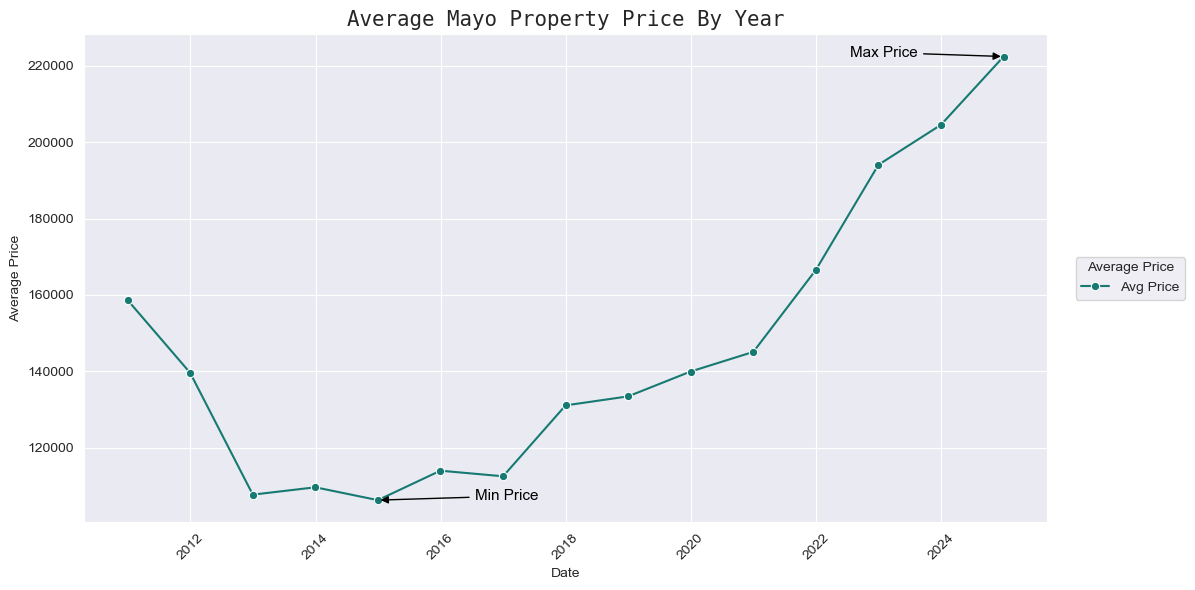

In [33]:
yearly_mayo = df_mayo["Price in Euro"].resample("Y").mean().round()
plt.figure(figsize=(12, 6))
sns.set_style("darkgrid")
sns.set_palette("BrBG_r")
ax = sns.lineplot(data=yearly_mayo, marker="o", label="Avg Price")
ax.set(xlabel="Date", ylabel="Average Price")
plt.title("Average Mayo Property Price By Year", family="monospace", fontsize=15)
plt.legend(title="Average Price",loc="center right",bbox_to_anchor=(1, 0, 0.15, 1)) 
plt.xticks(rotation=45)  

max_price = yearly_mayo.max()                           # Find the max price
max_year = yearly_mayo.idxmax()                         # Find the county with the max price
max_year_num = mdates.date2num(max_year)          # Convert max_year to its numerical equivalent for shifting

ax.annotate(
    "Max Price",
    xy=(max_year, max_price),
    xytext=(max_year_num -700, max_price + 2),  # Small upward shift
    arrowprops=dict(arrowstyle="-|>", color="black"),
    fontsize=11,
    color="black",
    horizontalalignment="center")

min_price = yearly_mayo.min()                           # Find the min price
min_year = yearly_mayo.idxmin()                       # Find the county with the min price
min_year_num = mdates.date2num(min_year)      # Convert max_year to its numerical equivalent for shifting

ax.annotate(
    "Min Price",
    xy=(min_year, min_price),
    xytext=(max_year_num - 2900, min_price - 2.5),  # Small downward shift
    arrowprops=dict(arrowstyle="-|>", color="black"),
    fontsize=11,
    color="black",
    horizontalalignment="center")                 

plt.tight_layout()
plt.show()

#### 5.2.3 Average Mayo Property Price by Month

In [34]:
monthly_mayo = df_mayo["Price in Euro"].resample("M").mean().round()
print(monthly_mayo)

Date of Sale
2010-01-31    137536.0
2010-02-28    162933.0
2010-03-31    176979.0
2010-04-30    171499.0
2010-05-31    156450.0
                ...   
2024-07-31    251376.0
2024-08-31    223248.0
2024-09-30    218310.0
2024-10-31    235069.0
2024-11-30    212091.0
Freq: ME, Name: Price in Euro, Length: 179, dtype: float64


C:\Users\curleys\AppData\Local\Temp\ipykernel_10500\4182137341.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_mayo = df_mayo["Price in Euro"].resample("M").mean().round()


C:\Users\curleys\AppData\Local\Temp\ipykernel_10500\1226807887.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_mayo = df_mayo["Price in Euro"].resample("M").mean().round()


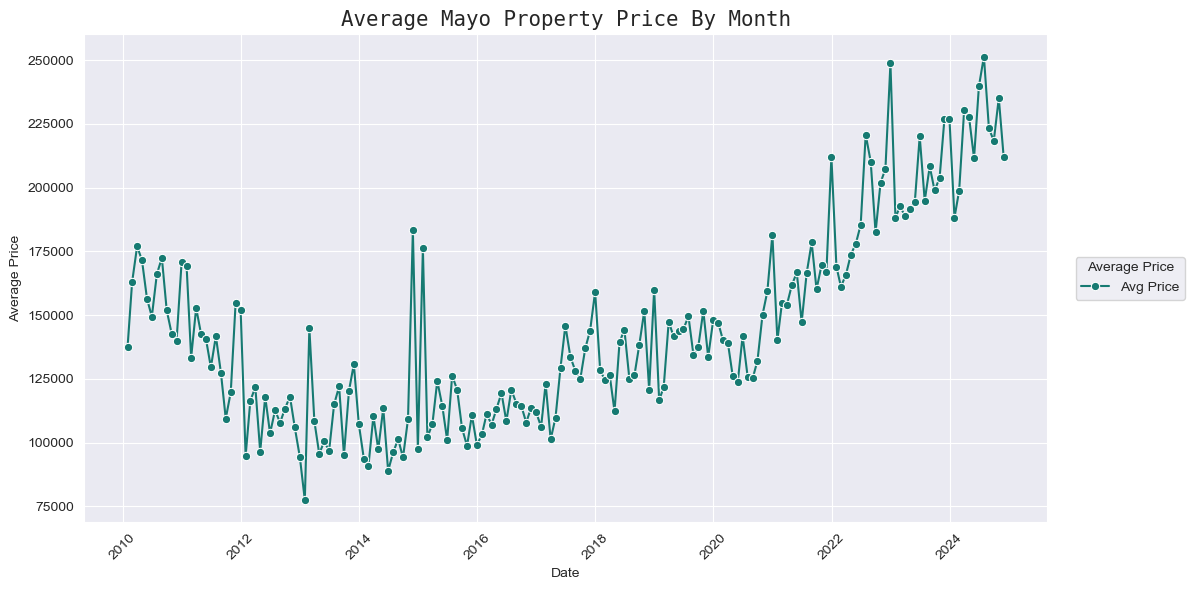

In [35]:
monthly_mayo = df_mayo["Price in Euro"].resample("M").mean().round()
plt.figure(figsize=(12, 6))
sns.set_style("darkgrid")
sns.set_palette("BrBG_r")
ax = sns.lineplot(data=monthly_mayo, marker='o', label='Avg Price')
ax.set(xlabel="Date", ylabel="Average Price")
plt.title("Average Mayo Property Price By Month", family="monospace", fontsize=15)
plt.legend(title="Average Price",loc="center right",bbox_to_anchor=(1, 0, 0.15, 1)) 
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()


C:\Users\curleys\AppData\Local\Temp\ipykernel_10500\2476865069.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_mayo = df_mayo["Price in Euro"].resample("M").mean().round()


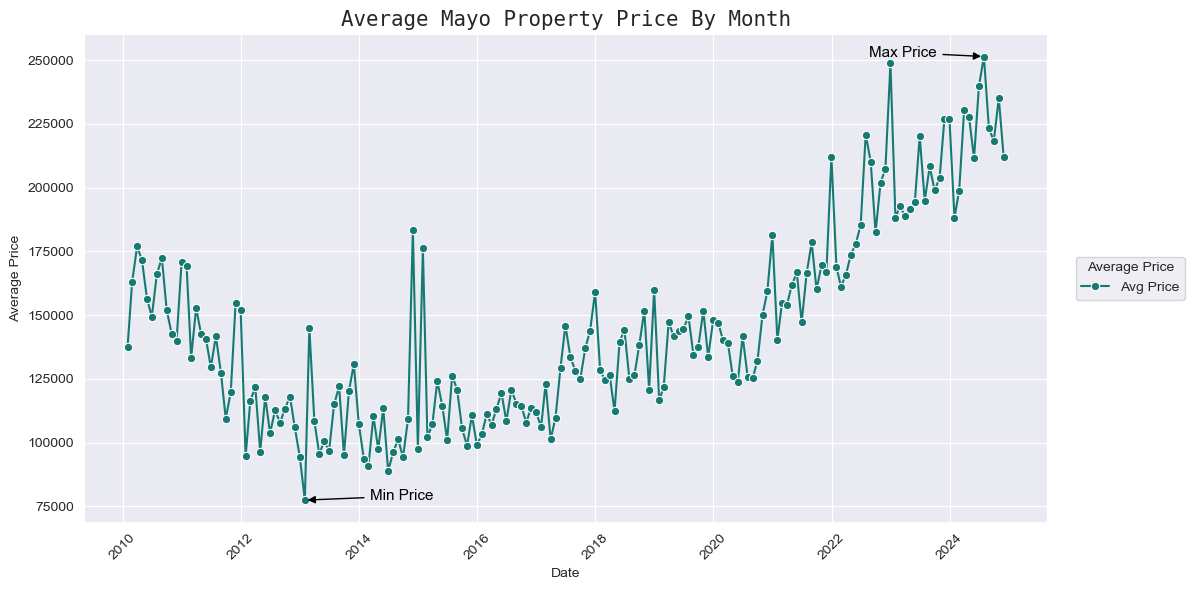

In [ ]:
monthly_mayo = df_mayo["Price in Euro"].resample("M").mean().round()
plt.figure(figsize=(12, 6))
sns.set_style("darkgrid")
sns.set_palette("BrBG_r")
ax = sns.lineplot(data=monthly_mayo, marker='o', label='Avg Price')
ax.set(xlabel="Date", ylabel="Average Price")
plt.title("Average Mayo Property Price By Month", family="monospace", fontsize=15)
plt.legend(title="Average Price",loc="center right",bbox_to_anchor=(1, 0, 0.15, 1)) 
plt.xticks(rotation=45)  

max_price = monthly_mayo.max()                           # Find the max price
max_month = monthly_mayo.idxmax()                         # Find the county with the max price
max_month_num = mdates.date2num(max_month)          # Convert max_year to its numerical equivalent for shifting

ax.annotate(
    "Max Price",
    xy=(max_month, max_price),
    xytext=(max_month_num -500, max_price + 2),  # Small upward shift
    arrowprops=dict(arrowstyle="-|>", color="black"),
    fontsize=11,
    color="black",
    horizontalalignment="center")

min_price = monthly_mayo.min()                           # Find the min price
min_month = monthly_mayo.idxmin()                       # Find the county with the min price
min_month_num = mdates.date2num(min_month)      # Convert max_year to its numerical equivalent for shifting

ax.annotate(
    "Min Price",
    xy=(min_month, min_price),
    xytext=(max_month_num - 3600, min_price - 2.5),  # Small downward shift
    arrowprops=dict(arrowstyle="-|>", color="black"),
    fontsize=11,
    color="black",
    horizontalalignment="center")     

plt.tight_layout()
plt.show()

#### 5.2.4 Average Mayo Property Price by month in 2024

In [47]:
df_mayo_2024=df_mayo[df_mayo.index.year==2024]
print(df_mayo_2024)

             Date of Sale (dd/mm/yyyy)  \
Date of Sale                             
2024-01-02                  02/01/2024   
2024-01-02                  02/01/2024   
2024-01-03                  03/01/2024   
2024-01-03                  03/01/2024   
2024-01-03                  03/01/2024   
...                                ...   
2024-11-20                  20/11/2024   
2024-11-20                  20/11/2024   
2024-11-21                  21/11/2024   
2024-11-22                  22/11/2024   
2024-11-22                  22/11/2024   

                                                  Address County  Eircode  \
Date of Sale                                                                
2024-01-02    151 GREENHILLS ESTATE, BALLINA, COUNTY MAYO   Mayo  F26V1K2   
2024-01-02           BOHAUN COTTAGE, KILLAVALLY, WESTPORT   Mayo  F28F653   
2024-01-03                15 THE WILLOWS, CASTLEBAR, MAYO   Mayo  F23FH50   
2024-01-03              26 BARLEYHILL COURT, BOHOLA, MAYO   Mayo  F1

Before the analysis, I need to set the `Date of Sale` from Object to datetime. 

In [48]:
df_mayo_2024["Date of Sale (dd/mm/yyyy)"]

Date of Sale
2024-01-02    02/01/2024
2024-01-02    02/01/2024
2024-01-03    03/01/2024
2024-01-03    03/01/2024
2024-01-03    03/01/2024
                 ...    
2024-11-20    20/11/2024
2024-11-20    20/11/2024
2024-11-21    21/11/2024
2024-11-22    22/11/2024
2024-11-22    22/11/2024
Name: Date of Sale (dd/mm/yyyy), Length: 1170, dtype: object

In [83]:
df_mayo_2024["Date of Sale"] = pd.to_datetime(df_mayo_2024["Date of Sale (dd/mm/yyyy)"], format="%d/%m/%Y")
print(df_mayo_2024)

             Date of Sale (dd/mm/yyyy)  \
Date of Sale                             
2024-01-02                  02/01/2024   
2024-01-02                  02/01/2024   
2024-01-03                  03/01/2024   
2024-01-03                  03/01/2024   
2024-01-03                  03/01/2024   
...                                ...   
2024-11-20                  20/11/2024   
2024-11-20                  20/11/2024   
2024-11-21                  21/11/2024   
2024-11-22                  22/11/2024   
2024-11-22                  22/11/2024   

                                                  Address County  Eircode  \
Date of Sale                                                                
2024-01-02    151 GREENHILLS ESTATE, BALLINA, COUNTY MAYO   Mayo  F26V1K2   
2024-01-02           BOHAUN COTTAGE, KILLAVALLY, WESTPORT   Mayo  F28F653   
2024-01-03                15 THE WILLOWS, CASTLEBAR, MAYO   Mayo  F23FH50   
2024-01-03              26 BARLEYHILL COURT, BOHOLA, MAYO   Mayo  F1

C:\Users\curleys\AppData\Local\Temp\ipykernel_10500\308208227.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mayo_2024["Date of Sale"] = pd.to_datetime(df_mayo_2024["Date of Sale (dd/mm/yyyy)"], format="%d/%m/%Y")


In [90]:
df_mayo_2024["Date of Sale"]

Date of Sale
2024-01-02   2024-01-02
2024-01-02   2024-01-02
2024-01-03   2024-01-03
2024-01-03   2024-01-03
2024-01-03   2024-01-03
                ...    
2024-11-20   2024-11-20
2024-11-20   2024-11-20
2024-11-21   2024-11-21
2024-11-22   2024-11-22
2024-11-22   2024-11-22
Name: Date of Sale, Length: 1170, dtype: datetime64[ns]

Set the new datetime column as the index

In [50]:
df_mayo_2024.set_index("Date of Sale", inplace=True)

In [52]:
monthly_mayo_2024 = df_mayo_2024["Price in Euro"].resample("M").mean().round()
print(monthly_mayo_2024)

Date of Sale
2024-01-31    188234.0
2024-02-29    198817.0
2024-03-31    230541.0
2024-04-30    227639.0
2024-05-31    211512.0
2024-06-30    239625.0
2024-07-31    251376.0
2024-08-31    223248.0
2024-09-30    218310.0
2024-10-31    235069.0
2024-11-30    212091.0
Freq: ME, Name: Price in Euro, dtype: float64


C:\Users\curleys\AppData\Local\Temp\ipykernel_10500\2823886978.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_mayo_2024 = df_mayo_2024["Price in Euro"].resample("M").mean().round()


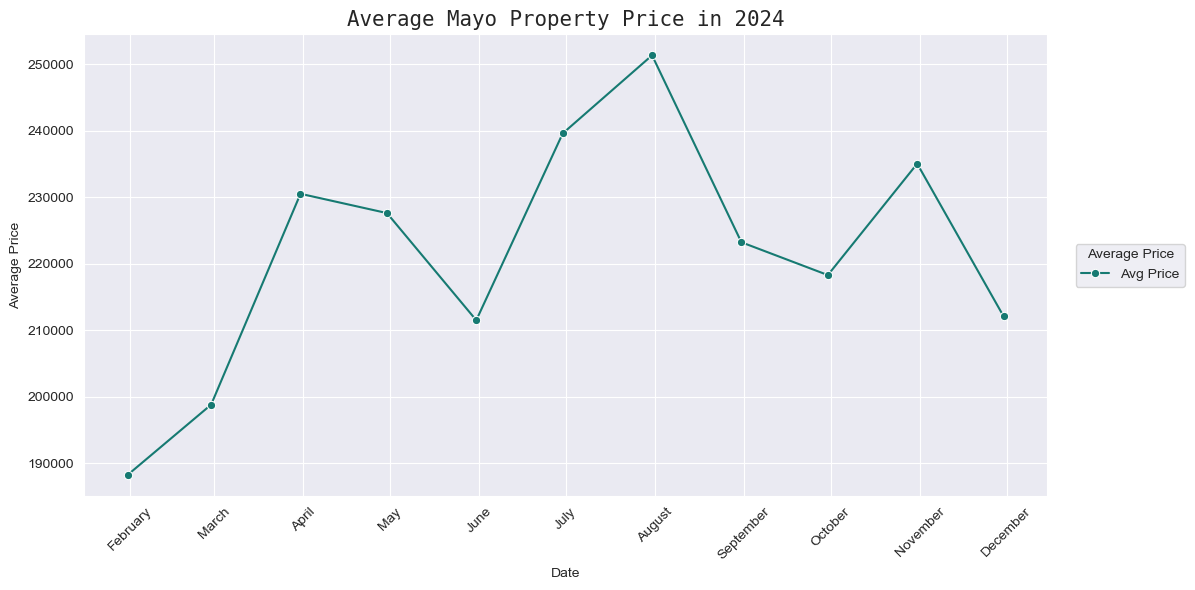

In [84]:
monthly_mayo_2024 = df_mayo_2024["Price in Euro"].resample("ME").mean().round()
plt.figure(figsize=(12, 6))
sns.set_style("darkgrid")
sns.set_palette("BrBG_r")
ax = sns.lineplot(data=monthly_mayo_2024, marker="o", label="Avg Price")
ax.set(xlabel="Date", ylabel="Average Price")
plt.title("Average Mayo Property Price in 2024", family="monospace", fontsize=15)
plt.legend(title="Average Price",loc="center right",bbox_to_anchor=(1, 0, 0.15, 1)) 
ax.xaxis.set_major_formatter(mdates.DateFormatter('%B'))        # # '%B' for full month name  matplotlib.dates.DateFormatter
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()


#### 5.2.5 Number of property sales in Mayo in 2024

In [54]:
mayo_counts = df_mayo_2024["County"].value_counts().sort_values()
print(mayo_counts)

County
Mayo    1170
Name: count, dtype: int64


#### 5.2.6 Number of occurrences of each property type in Mayo

In [55]:
description_of_property_counts_mayo = df_mayo_2024["Description of Property"].value_counts().sort_values()
print(description_of_property_counts_mayo)

Description of Property
New Dwelling house /Apartment              76
Second-Hand Dwelling house /Apartment    1094
Name: count, dtype: int64


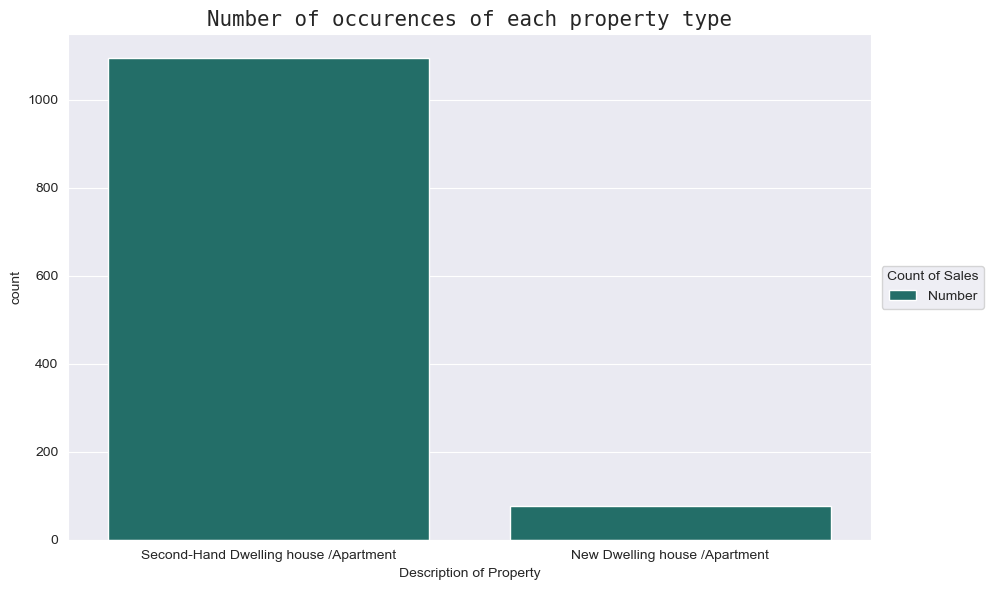

In [56]:
description_of_property_counts_mayo = df_mayo_2024["Description of Property"].value_counts().sort_values()
plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")
sns.set_palette("BrBG_r")
ax = sns.countplot(data=df_mayo_2024, x="Description of Property", label="Number")
plt.title("Number of occurences of each property type", family="monospace", fontsize=15)
plt.legend(title="Count of Sales",loc="center right",bbox_to_anchor=(1, 0, 0.15, 1)) 
plt.xticks(rotation=360, ha="center")                        
plt.tight_layout()
plt.show()

#### 5.2.7 Average proprety price by property type in Mayo in 2024

In [58]:
avg_price_by_property_type_mayo = df_mayo_2024.groupby("Description of Property")["Price in Euro"].mean().round().sort_values()
print(avg_price_by_property_type_mayo)

Description of Property
Second-Hand Dwelling house /Apartment    211878.0
New Dwelling house /Apartment            374523.0
Name: Price in Euro, dtype: float64


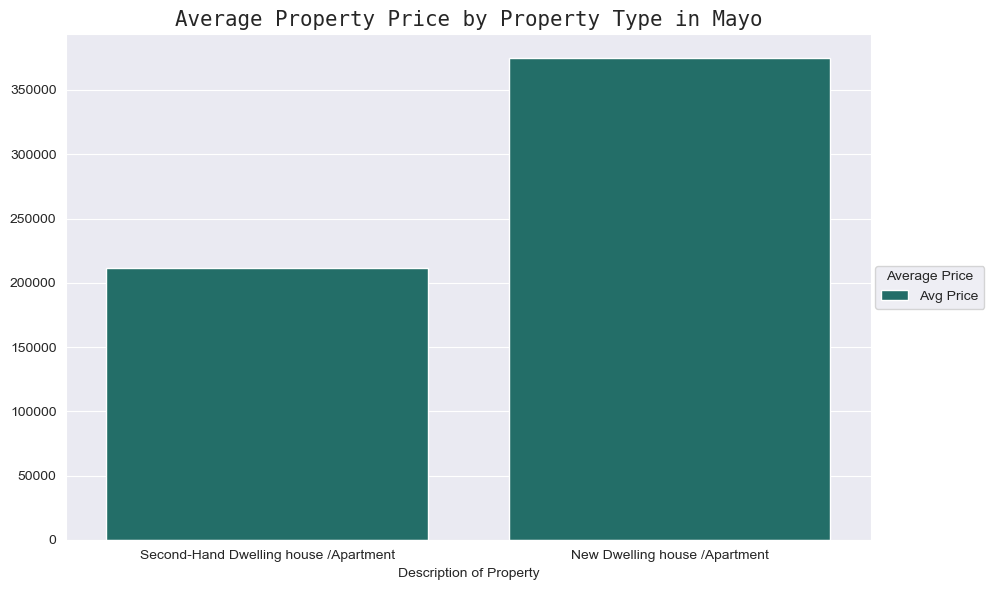

In [59]:
avg_price_by_property_type_mayo = df_mayo_2024.groupby("Description of Property")["Price in Euro"].mean().round().sort_values()
plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")
sns.set_palette("BrBG_r")
sns.barplot(x=avg_price_by_property_type_mayo.index, y=avg_price_by_property_type_mayo.values,label="Avg Price")
plt.title("Average Property Price by Property Type in Mayo", family="monospace", fontsize=15)
plt.legend(title="Average Price",loc="center right",bbox_to_anchor=(1, 0, 0.15, 1)) 
plt.xticks(rotation=360, ha="center")                  
plt.tight_layout()
plt.show()

#### 5.2.8  Full Market price comparison in Mayo

In [61]:
full_market_price_counts_mayo = df_mayo_2024["Not Full Market Price"].value_counts()
print(full_market_price_counts_mayo)

Not Full Market Price
No     1140
Yes      30
Name: count, dtype: int64


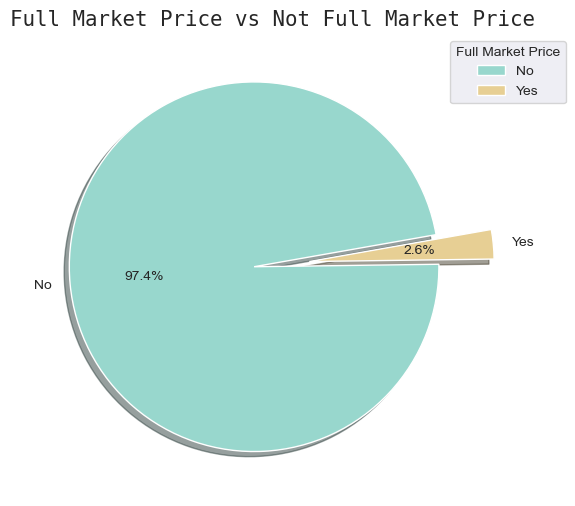

In [62]:
full_market_price_counts_mayo = df_mayo_2024["Not Full Market Price"].value_counts()
explode = (0.1, 0.2)          # the explode will help to separate the two elements
palette_colour=sns.color_palette("BrBG_r",n_colors=2)
plt.figure(figsize=(12, 6))
plt.pie(full_market_price_counts_mayo, labels=full_market_price_counts.index, autopct="%1.1f%%", colors=palette_colour, startangle=370, explode=explode, shadow=True)
plt.legend(title="Full Market Price",loc="best",bbox_to_anchor=(1, 0, 0.15, 1)) 
plt.title("Full Market Price vs Not Full Market Price", family="monospace", fontsize=15)
plt.show()

### 5.3 Analysis of Property Prices in Castlebar in 2024

#### 5.3.1

In [115]:
df_castlebar_addresses = df_mayo_2024 [df_mayo_2024 ["Address"].str.contains(r"Castlebar", case=False, na=False)] 
average_price = df_castlebar_addresses["Price in Euro"].mean()
castlebar_count = df_castlebar_addresses.shape[0]
print(f"The average price of a property in Castlebar in 2024 was €{average_price:,.2f}")
print(f"The number of properties sold in Castlebar during 2024 was {castlebar_count}")



The average price of a property in Castlebar in 2024 was €238,139.98
The number of properties sold in Castlebar during 2024 was 247


In [ ]:
#df_castlebar_addresses["Date of Sale (dd/mm/yyyy)"]

Date of Sale
2024-01-03    03/01/2024
2024-01-04    04/01/2024
2024-01-12    12/01/2024
2024-01-15    15/01/2024
2024-01-16    16/01/2024
                 ...    
2024-11-08    08/11/2024
2024-11-08    08/11/2024
2024-11-12    12/11/2024
2024-11-18    18/11/2024
2024-11-22    22/11/2024
Name: Date of Sale (dd/mm/yyyy), Length: 247, dtype: object

In [ ]:
#df_castlebar_addresses["Date of Sale"] = pd.to_datetime(df_castlebar_addresses["Date of Sale (dd/mm/yyyy)"], format="%d/%m/%Y",errors="coerce")

C:\Users\curleys\AppData\Local\Temp\ipykernel_10500\890331101.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_castlebar_addresses["Date of Sale"] = pd.to_datetime(df_castlebar_addresses["Date of Sale (dd/mm/yyyy)"], format="%d/%m/%Y",errors="coerce")


In [ ]:
#df_castlebar_addresses["Date of Sale"]

Date of Sale
2024-01-03   2024-01-03
2024-01-04   2024-01-04
2024-01-12   2024-01-12
2024-01-15   2024-01-15
2024-01-16   2024-01-16
                ...    
2024-11-08   2024-11-08
2024-11-08   2024-11-08
2024-11-12   2024-11-12
2024-11-18   2024-11-18
2024-11-22   2024-11-22
Name: Date of Sale, Length: 247, dtype: datetime64[ns]

In [ ]:
#df_castlebar_addresses.set_index("Date of Sale")

,Date of Sale (dd/mm/yyyy),Address,County,Eircode,Price in Euro,Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Year,Month
Date of Sale,,,,,,,,,,,
2024-01-03,03/01/2024,"15 THE WILLOWS, CASTLEBAR, MAYO",Mayo,F23FH50,210000.0,No,No,Second-Hand Dwelling house /Apartment,NaN,2024,1
2024-01-04,04/01/2024,"45 MANOR VILLAGE, CASTLEBAR, MAYO",Mayo,F23C856,215000.0,No,No,Second-Hand Dwelling house /Apartment,NaN,2024,1
2024-01-12,12/01/2024,"CLOONDUANE, BELCARRA, CASTLEBAR",Mayo,NaN,340000.0,No,No,Second-Hand Dwelling house /Apartment,NaN,2024,1
2024-01-15,15/01/2024,"59 RIVERDALE CT, CASTLEBAR, MAYO",Mayo,F23TY01,137500.0,No,No,Second-Hand Dwelling house /Apartment,NaN,2024,1
2024-01-16,16/01/2024,"DERRARTAN, ISLANDEADY, CASTLEBAR",Mayo,F23HE98,45000.0,No,No,Second-Hand Dwelling house /Apartment,NaN,2024,1
...,...,...,...,...,...,...,...,...,...,...,...
2024-11-08,08/11/2024,"4 CLYDAGH PARK, CASTLEBAR, MAYO",Mayo,F23AY92,255000.0,No,No,Second-Hand Dwelling house /Apartment,NaN,2024,11
2024-11-08,08/11/2024,"DAVITTS TCE, CASTLEBAR, CO MAYO",Mayo,F23AY68,270000.0,No,No,Second-Hand Dwelling house /Apartment,NaN,2024,11
2024-11-12,12/11/2024,"89 CHESTNUT GROVE, CASTLEBAR, MAYO",Mayo,NaN,180000.0,No,No,Second-Hand Dwelling house /Apartment,NaN,2024,11


In [ ]:
average_price = df_castlebar_addresses["Price in Euro"].mean()
print(f"The average price of a property in Castlebar in 2024 was €{average_price:,.2f}")


The average price of a property in Castlebar in 2024 was €238,139.98


In [111]:
castlebar_count = df_castlebar_addresses.shape[0]
print(f"The number of properties sold in Castlebar during 2024 was {castlebar_count}")

The number of properties sold in Castlebar during 2024 was 247


***
## End

